In [1]:
import numpy as np
import matplotlib.pyplot as plt

entries = os.listdir('../../cmf_rateslib/curves')
print(entries)

import sys  
sys.path.insert(0, '../../cmf_rateslib/curves')

import os

import interpolator as interp
from zero_curve import ZeroCurve
from base_curve import BaseZeroCurve



['zero_curve.py', 'interpolator.py', '__pycache__', 'base_curve.py', '__init__.py', 'test.py']


Demonstration of interpolation methods

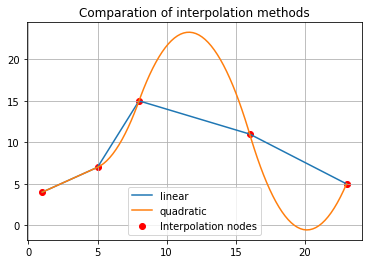

In [2]:
xp = np.array([1., 5., 8., 16., 23.])
yp = np.array([4., 7., 15., 11., 5.])
x = np.linspace(1, 23, 100)
f = interp.Interpolator(xp, yp, "linear")
res = f.interp(x)
plt.plot(x, res)

f = interp.Interpolator(xp, yp, "quadratic")
res = f.interp(x)
plt.plot(x, res)
plt.scatter(xp, yp, color='r')
plt.legend(["linear", "quadratic", "Interpolation nodes"])
plt.title("Comparation of interpolation methods")
plt.grid()
plt.show()


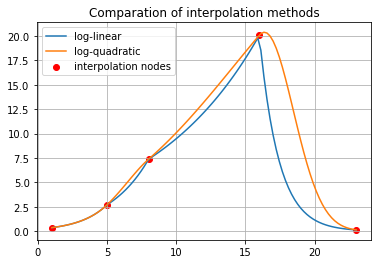

In [3]:
xp = np.array([1., 5., 8., 16., 23.])
yp = np.exp(np.array([-1., 1., 2., 3., -2.]))
x = np.linspace(1, 23, 100)
f = interp.Interpolator(xp, yp, "log_linear")
res = f.interp(x)
plt.plot(x, res)

f = interp.Interpolator(xp, yp, "log_quadratic")
res = f.interp(x)
plt.plot(x, res)

plt.scatter(xp, yp, color='r')

plt.legend(["log-linear", "log-quadratic", "interpolation nodes"])
plt.title("Comparation of interpolation methods")
plt.grid()
plt.show()
            

Curves bumping

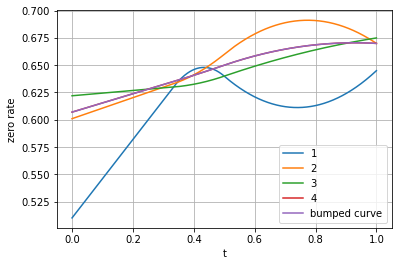

In [8]:
rates1 = np.array([0.6,   0.63,  0.64, 0.645]) 
rates2 = np.array([0.625, 0.633, 0.66, 0.67])
rates3 = np.array([0.628, 0.63,  0.64, 0.675])
rates4 = np.array([0.628, 0.635, 0.65, 0.67])

rates = [rates1, rates2, rates3, rates4]
maturities = np.array([1/4, 1/3, 1/2, 1.])

zc_arr = []
for i in range(0, 4):
    zc_arr.append(ZeroCurve(maturities, rates[i], interp_method="quadratic"))
cov = ZeroCurve.get_cov_matrix(zc_arr, maturities)
dr = {1: 0.01, 3: 0.06}
zc = zc_arr[-1]
zc.zero_rate(maturities)

res = zc.PCAbump(dr, cov, adj=0.01)
t = np.linspace(0, 1, 1000)

for i in range(0, 4):
    plt.plot(t, zc_arr[i].zero_rate(t))

plt.plot(t, zc.zero_rate(t))
plt.legend(["1", "2", "3", "4", "bumped curve"])
plt.xlabel("t")
plt.ylabel("zero rate")
plt.grid(True)



In [43]:
A = np.array([[1, 2], [2, 1]])
lambd, U = np.linalg.eigh(A)
print(U @ np.diag(lambd) @ U.T)

[[1. 2.]
 [2. 1.]]


In [66]:
dr = {1: 0.001, 3: 0.002, 0: 0.04}
V = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]])
b = np.array(list(dr.values()))
A = np.array([V[i, :] for i in dr.keys()])
print(V[[1, 2, 3]])

set(np.array([1, 2, 3]))

[[2 2 2]
 [3 3 3]
 [4 4 4]]


{1, 2, 3}